# Задание 4

Седых Иван Дмитриевич БПМ181

In [1]:
import math

import numpy as np
import sympy as sym
from scipy import odr
from matplotlib import pyplot as plt
import tqdm
import seaborn as sns
from plotly import graph_objects as go


np.set_printoptions(suppress=True)
plt.style.use('ggplot')

---
## Task 1

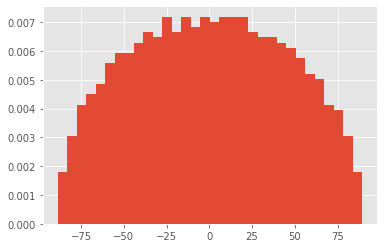

In [24]:
n = 1000
a = np.random.normal(0, 1, (n, n))
A = a + a.T

lam = np.linalg.eigvalsh(A)
plt.hist(lam, bins='sqrt', density=True);

Это демонстрация [полукругового закона Вигнера](https://en.wikipedia.org/wiki/Wigner_semicircle_distribution)

---
## Task 2

Для точности минимального с.з. в 1% достаточно 2 итераций


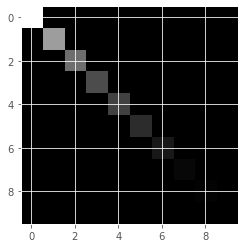

In [105]:
n = 10
a = np.random.normal (0, 1, (n, n))
A = a @ a.T

true_lam = np.linalg.eigvalsh(A)
min_true_lam = true_lam.min()

precision = 0.01
first_time = True
max_iter = 100
for k in range(max_iter):
    Q, R = np.linalg.qr(A)
    A = R @ Q
    lam = np.diag(A)
    min_my_lam = lam.min()
    rel_err = np.abs(min_true_lam - min_my_lam) / min_true_lam
    if rel_err <= precision and first_time:
        print(f"Для точности минимального с.з. в 1% достаточно {k+1} итераций")
        first_time = False

# проверим, что нашли ок
np.testing.assert_allclose(np.sort(true_lam), np.sort(lam))

plt.imshow(A, cmap='gray');

---
## Task 3

In [6]:
A = np.array([[0, 1],[0, 0]])
# спектр матрицы A
np.linalg.eigvals(A)

array([0., 0.])

Изобразим множество $\sigma_{\epsilon} = \left\{ z \in \mathbb{C} : \quad ∥(zI − A)^{-1}∥_2 \ge \epsilon^{-1} \right\}$  
Известно ([задача 26.1 Trefethen, Bau]), что это эквивалентно тому что $z$ является собственным значением $A + δA$ для некоторых  $δA$ таких что $∥δA∥_2 ≤ \epsilon$.  

То есть $\sigma_{\epsilon}$ это искомое множество собственых значений

In [7]:
def complex_mash(limit=1, n_points=100):
    """ create square complex mesh
    """
    reals = np.linspace(-limit, limit, n_points)
    imgs = np.linspace(-limit, limit, n_points)
    z_real, z_img = np.meshgrid(reals, imgs)
    z = z_real + 1j*z_img
    return z

def is_ok(z, A, eps=0.1):
    lhs = np.linalg.norm(np.linalg.inv(z * np.eye(2) - A), ord=2)
    return lhs >= 1 / eps

vector_is_ok = np.vectorize(is_ok, excluded=['A', 'eps'])

r^2=0.1088, epsilon=0.1
r^2=0.1088, eps*(eps+1)=0.1100


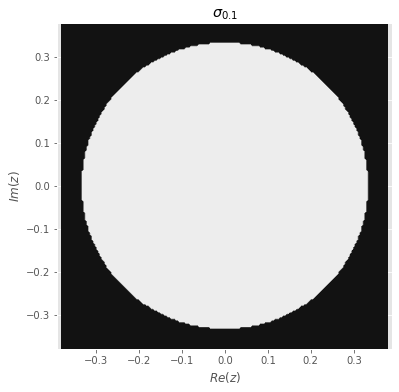

In [21]:
eps = 0.1
lim = 1.2 * np.sqrt(eps)
z = complex_mash(lim, 200)

res = vector_is_ok(z, A=A, eps=eps)
r = (np.real(z[res]).max() - np.real(z[res]).min()) / 2
print(f"r^2={r**2:.4f}, epsilon={eps}")
print(f"r^2={r**2:.4f}, eps*(eps+1)={eps*(eps+1):.4f}")

plt.figure(figsize=(6, 6))
plt.axis('equal')
plt.contourf(np.real(z), np.imag(z), res, cmap='gray')
plt.xlabel("$Re(z)$")
plt.ylabel("$Im(z)$")
plt.title(f"$\sigma_{ {eps} } $");

r^2=0.0099, epsilon=0.01
r^2=0.0099, eps*(eps+1)=0.0101


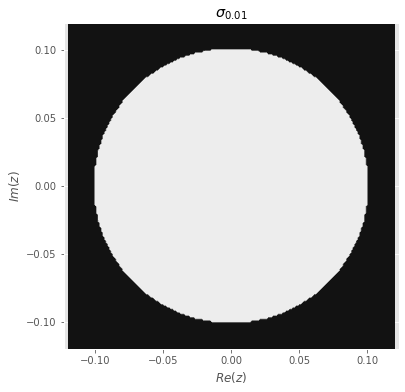

In [22]:
eps = 0.01
lim = 1.2 * np.sqrt(eps)
z = complex_mash(lim, 200)

res = vector_is_ok(z, A=A, eps=eps)
r = (np.real(z[res]).max() - np.real(z[res]).min()) / 2
print(f"r^2={r**2:.4f}, epsilon={eps}")
print(f"r^2={r**2:.4f}, eps*(eps+1)={eps*(eps+1):.4f}")

plt.figure(figsize=(6, 6))
plt.axis('equal')
plt.contourf(np.real(z), np.imag(z), res, cmap='gray')
plt.xlabel("$Re(z)$")
plt.ylabel("$Im(z)$")
plt.title(f"$\sigma_{ {eps} } $");

Видим, что множество это круг. То есть это ограничение по модулю $z$. Есть предположение, что $r^2 = \epsilon$

*Спойлер: это не совсем так.*

4 ое условие из книжки возведем в квадрат.
$$
||(zI - A)^{-1}||_2^2 \ge \frac{1}{\epsilon^2}
$$
Явно возьмем обратую матрицу и вынесем скаляр.
$$
||(zI - A)^{-1}||_2^2 = 
\frac{1}{|z|^4} \begin{Vmatrix} z && 1 \\ 0 && z \end{Vmatrix}_2^2
\ge \frac{1}{\epsilon^2}
\quad \quad (1)
$$
Напишем явно, чему равно 2-норма этой матрицы
$$
||B||^2_2 = \lambda_{max}(B^T B)
$$
$$
\begin{bmatrix} z && 0 \\ 1 && z \end{bmatrix} \begin{bmatrix} z && 1 \\ 0 && z \end{bmatrix} = 
\begin{bmatrix} z^2 && z \\ z && z^2+1 \end{bmatrix}
$$
характеристический многочлен будет иметь вид: $\lambda^2 + (-1 -2z^2)\lambda + z^4 = 0$, а его корень:
$$
\lambda_{max} = \frac{2z^2+1 + \sqrt{4z^2+1}}{2}
$$
Подставим в (1):
$$
\frac{2z^2+1 + \sqrt{4z^2+1}}{2 |z|^4} \ge \frac{1}{\epsilon^2}
$$

Ну вот собственно так мы задали подходящие $z$. В другом виде это выглядит так:
$$
|z|^2 \le \epsilon (\epsilon + 1)
$$

**ИТОГ**  
То есть на самом деле радиус круга $r^2 = \epsilon (\epsilon + 1)$

---
## Task 4

http://www.stat.uchicago.edu/~lekheng/courses/309f10/modified.pdf

### n = 10

In [127]:
n = 10
D = np.diag(np.random.normal(size=n))
u = np.random.normal(size=(n, 1))
A = D + (u @ u.T) / (u.T @ u)

vals, vecs = np.linalg.eig(A)
min_ix = np.argmin(vals)
min_val = vals[min_ix]
min_vec = vecs[:, min_ix]

assert np.allclose(A @ min_vec, min_val * min_vec)

### n = 100

https://arxiv.org/pdf/1706.00773.pdf

$$
f( \widetilde{\lambda} ) = 1 + \sigma \sum_{i=1}^N \frac{\zeta_i^2}{\lambda_i - \widetilde{\lambda}} = 0
$$

$A = D + \sigma uu^T$ в нашем случае $D$ - диагональная, ее собственые значаения $\lambda_i = d_i$ это элементы на диагонали.  
$\sigma = \frac{1}{u^T u}$

$$
f( \widetilde{\lambda} ) = 1 + \frac{1}{u^T u} \sum_{i=1}^N \frac{u_i^2}{d_i - \widetilde{\lambda}} = 0
$$

Кароч, в статье написано, что новые собственные значения лежат между старыми.  
надо найти корень функции $f$ на отрезке между двуми минимальными элементами $D$, это будет минимальным новым собственным значением.

In [128]:
n = 100
d = np.random.normal(size=(n, 1))
D = np.diag(d.flatten())
u = np.random.normal(size=(n, 1))
A = D + (u @ u.T) / (u.T @ u)

In [129]:
from scipy.optimize import root_scalar

def func(lam, d, u):
    res = 1 + 1 / (u.T @ u) * np.sum(u**2 / (d - lam))
    return res.flatten()

In [130]:
d = d.reshape(-1, 1)
bracket = list(np.sort(d, axis=0)[:2].flatten())
eps = np.abs(bracket[0] - bracket[1]) / 1000
bracket[0] += eps
bracket[1] -= eps


res = root_scalar(func, (d, u), bracket=bracket)
res

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: -2.185135256839888

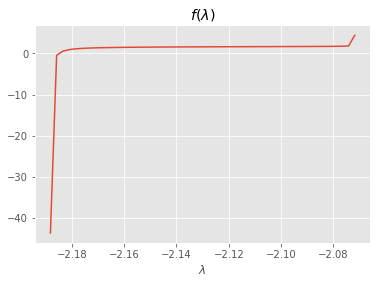

In [131]:
xs = np.linspace(*bracket)
ys = [func(x, d, u) for x in xs]
plt.plot(xs,ys)
plt.title("$f(\lambda)$")
plt.xlabel("$\lambda$");

https://en.wikipedia.org/wiki/Bunch%E2%80%93Nielsen%E2%80%93Sorensen_formula

$$
(\tilde q_{min})_k = \frac{u_k}{\lambda_k - \tilde \lambda_{min}}
$$
Найдем соответсвующий собственный вектор и проверим по определению что все ок.

In [126]:
min_val = res.root
min_vec = u / (d - min_val)
assert np.allclose(A @ min_vec, min_val * min_vec)

---
## Task 5